#### Import libraries

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

In [3]:
def get_epoch_metrics(csv_path, epoch):
    # Cargar el archivo Excel
    df = pd.read_csv(csv_path)
    df.set_index('Epoch', inplace=True)
    df = df.iloc[:, :-1]

    # Verificar si la época existe
    if epoch not in df.index:
        raise ValueError(f"Epoch {epoch} no encontrada en el archivo.")
    
    row = df.loc[epoch]
    metric_names = df.columns.tolist()
    metric_values = row.tolist()

    return metric_names, metric_values

In [4]:
mode = 'valid'
model = 'Full_Images_200_epochs'

csv_path = os.path.join(os.getcwd(), '..', 'AirPollution_Run', model, 'output', 'metrics', mode, 'metrics.csv')

epoch = 169

metrics_names, metrics = get_epoch_metrics(csv_path, epoch)

In [5]:
print(len(metrics_names), len(metrics))

11 11


In [6]:
for i in range(len(metrics_names)):
    print(f"{i}: {metrics_names[i]}: {metrics[i]}")

0: l1Error_total: 1.1818504333496094
1: l2Error_total: 5.180364608764648
2: Bias_time: -0.2331093549728393
3: Bias_space: -0.2331093400716781
4: Corr_time: 0.8686729073524475
5: Corr_space: 0.93549245595932
6: RMSE_time: 1.7761493921279907
7: RMSE_space: 2.098052978515625
8: PeakSignalNoiseRatio: 44.13431930541992
9: StructuralSimilarityIndexMeasure: 0.9774671792984008
10: UniversalImageQualityIndex: 0.371531218290329


In [7]:
metrics_names[8] = metrics_names[8] + '_%'
metrics[8] = metrics[8] / 100

In [8]:
def Spyder_plot(metrics, MSE_loss, MAE_loss, WMSE_loss, WMAE_loss):
    
    # It ensures that the values ​​are closed to form the polygon.
    MSE = MSE_loss + [MSE_loss[0]]
    MAE = MAE_loss + [MAE_loss[0]]
    WMSE = WMSE_loss + [WMSE_loss[0]]
    WMAE = WMAE_loss + [WMAE_loss[0]]

    # Define the angle for the axes
    angles = [n / float(len(metrics)) * 2 * pi for n in range(len(metrics))]
    angles += angles[:1]

    # Define the plot
    fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))

    # Plot for the model 1
    ax.fill(angles, MSE, color='blue', alpha=0.25)
    ax.plot(angles, MSE, color='blue', linewidth=2, label='MSE')

    # Plot for the model 2
    ax.fill(angles, MAE, color='red', alpha=0.25)
    ax.plot(angles, MAE, color='red', linewidth=2, label='MAE')

    # Plot for the model 3
    ax.fill(angles, WMSE, color='green', alpha=0.25)
    ax.plot(angles, WMSE, color='green', linewidth=2, label='W-MSE')

    # Plot for the model 4
    ax.fill(angles, WMAE, color='orange', alpha=0.25)
    ax.plot(angles, WMAE, color='orange', linewidth=2, label='W-MAE')

    # Customizing axis labels
    plt.xticks(angles[:-1], metrics)

    # Set the ticks for the radial axis
    max_value = max(max(MSE), max(MAE), max(WMSE), max(WMAE))
    step = 10
    ticks = [i * step for i in range(int(max_value / step) + 1)]
    ax.set_yticks(ticks)

    # Legend
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    # Show plot
    plt.show()

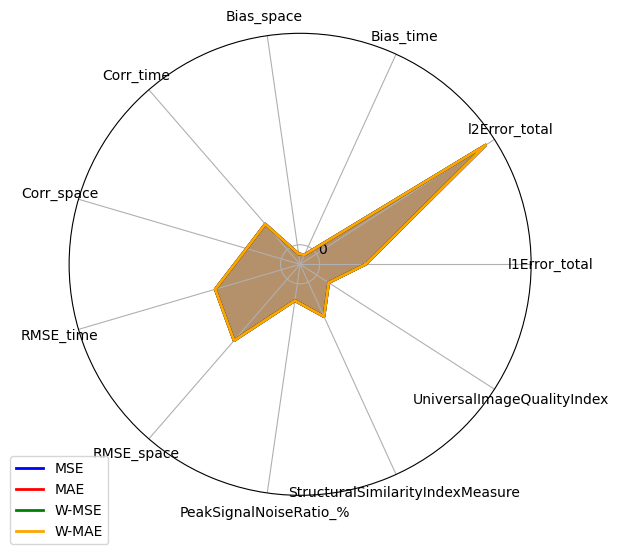

In [9]:
Spyder_plot(metrics_names, metrics, metrics, metrics, metrics)